In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Only get data analyst jobs in the Ireland
df_DA_IR = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Ireland')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IR = df_DA_IR.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_IR = df_DA_IR.explode('job_skills')

df_DA_IR[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
59621,72900.0,python
59621,72900.0,r
59621,72900.0,azure
59621,72900.0,power bi
59621,72900.0,tableau


In [5]:
df_DA_top_pay = df_DA_IR.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
git,1,194500.0
linux,1,194500.0
oracle,1,165000.0
nosql,1,163782.0
unify,1,163782.0
snowflake,3,147500.0
asana,1,147500.0
airflow,1,147500.0
slack,1,147500.0


In [6]:
df_DA_skills = df_DA_IR.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
snowflake,3,147500.0
python,6,104837.5
azure,5,100500.0
r,8,100500.0
sql,11,98500.0
sas,4,86700.0
tableau,9,80850.0
unreal,3,80850.0
power bi,5,72900.0


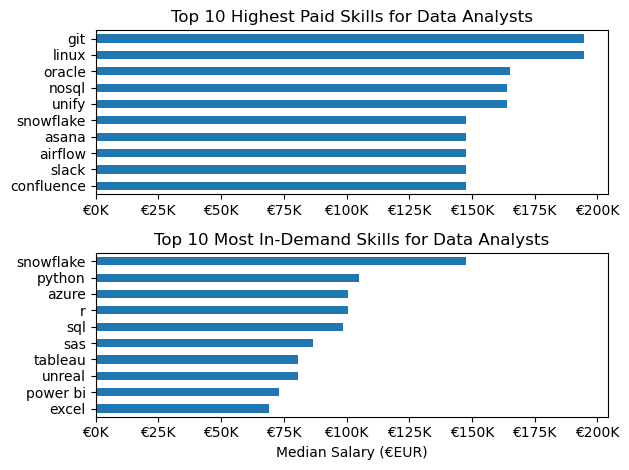

In [7]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (€EUR)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))


plt.tight_layout()
plt.show()